# Loan Application Status

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependants,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependants         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Applicant_Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Processing the Dataset

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependants           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# fill the missing values for numerical terms - mean
df['Loan_Amount']= df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Credit History']=df['Credit History'].fillna(df['Credit History'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())



In [22]:
# fill the missing values for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependants']=df['Dependants'].fillna(df['Dependants'].mode()[0])
df['Credit History']=df['Credit History'].fillna(df['Credit History'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependants           0
Education            0
Self_Employed        0
Applicant_Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

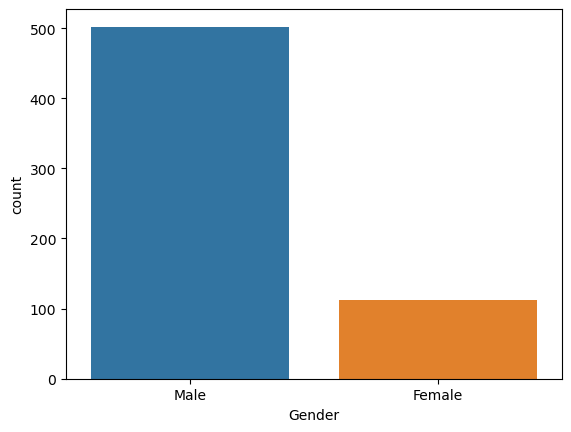

In [33]:
# categorical attributes visualization
import seaborn as sns
sns.countplot(df,x='Gender')

<Axes: xlabel='Married', ylabel='count'>

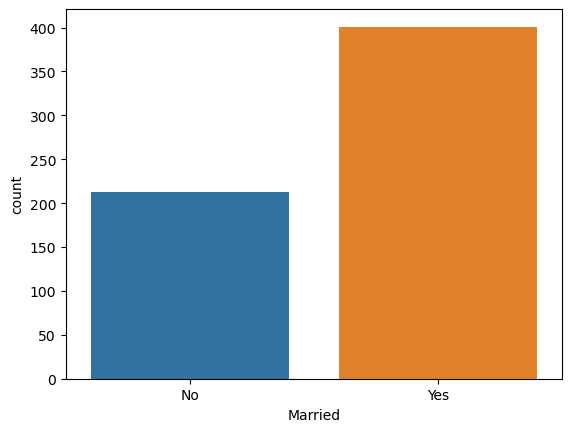

In [34]:
sns.countplot(df,x='Married')

<Axes: xlabel='Dependants', ylabel='count'>

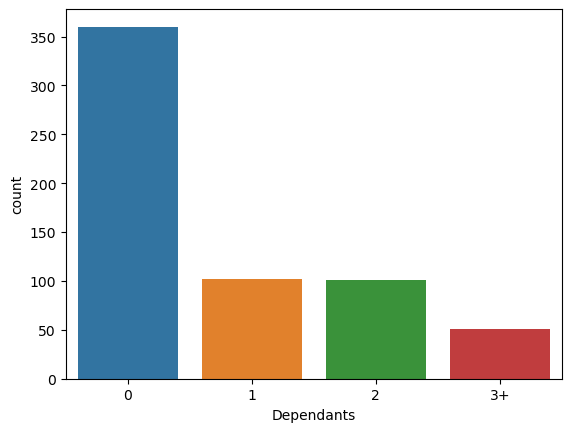

In [35]:
sns.countplot(df,x='Dependants')

<Axes: xlabel='Education', ylabel='count'>

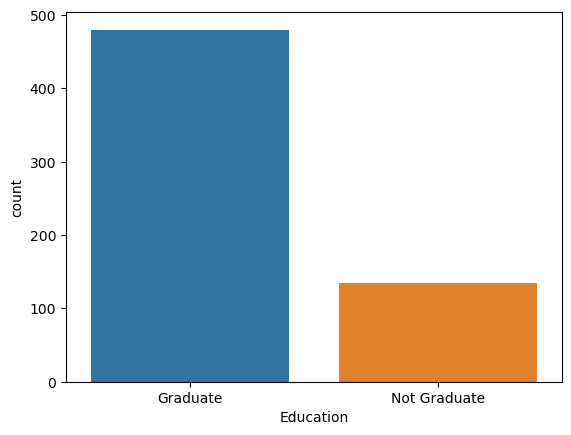

In [36]:
sns.countplot(df,x='Education')

<Axes: xlabel='Self_Employed', ylabel='count'>

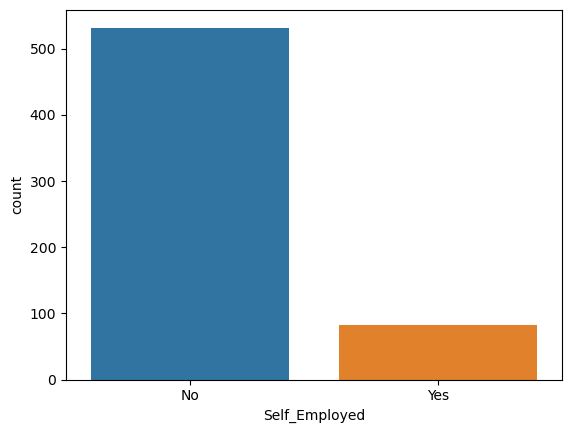

In [38]:
sns.countplot(df,x='Self_Employed')

<Axes: xlabel='Property_Area', ylabel='count'>

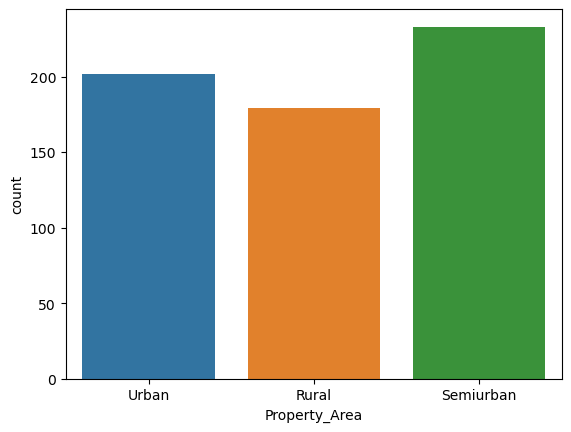

In [39]:
sns.countplot(df,x='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

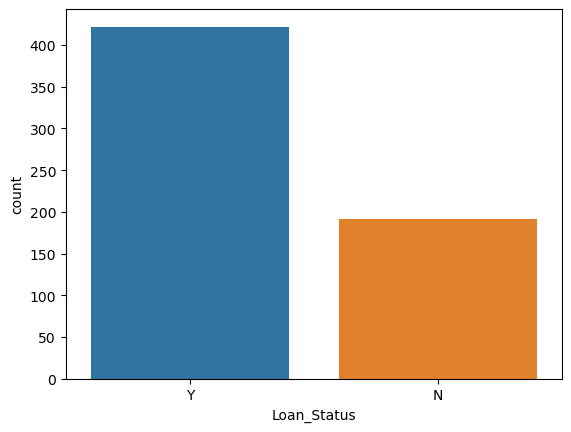

In [41]:
sns.countplot(df,x='Loan_Status')

<Axes: xlabel='Applicant_Income', ylabel='Density'>

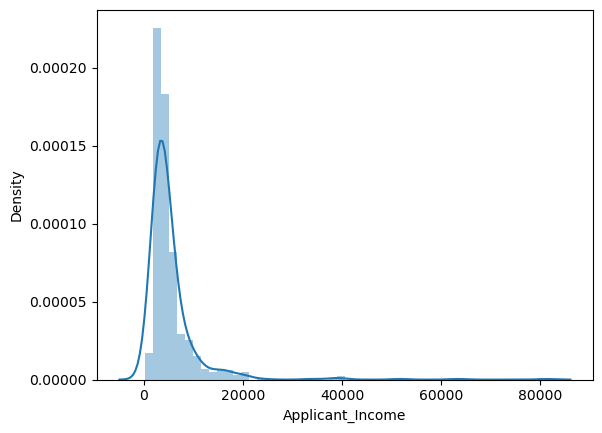

In [42]:
# numerical attributes visualization
sns.distplot(df['Applicant_Income'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependants         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Applicant_Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

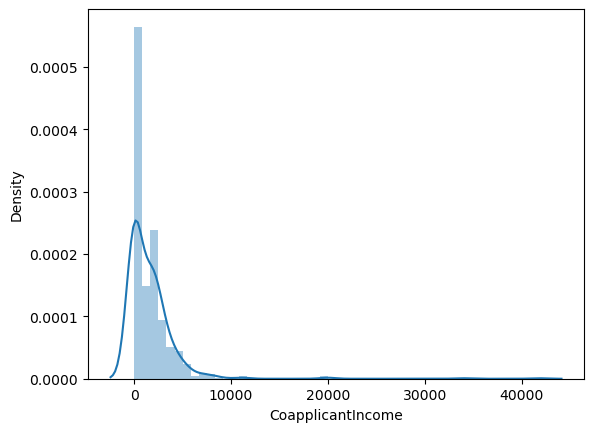

In [44]:
sns.distplot(df['CoapplicantIncome'])

<Axes: xlabel='Loan_Amount', ylabel='Density'>

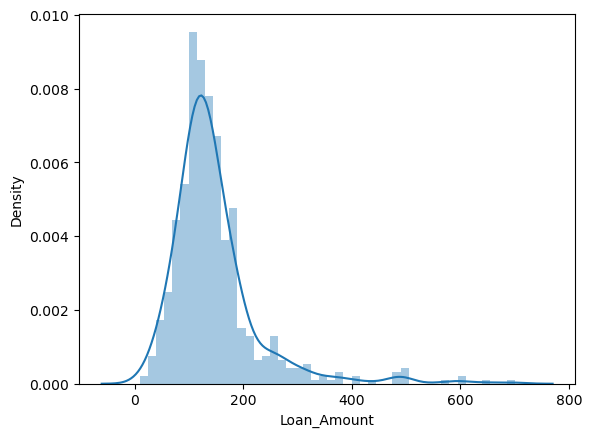

In [45]:
sns.distplot(df['Loan_Amount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

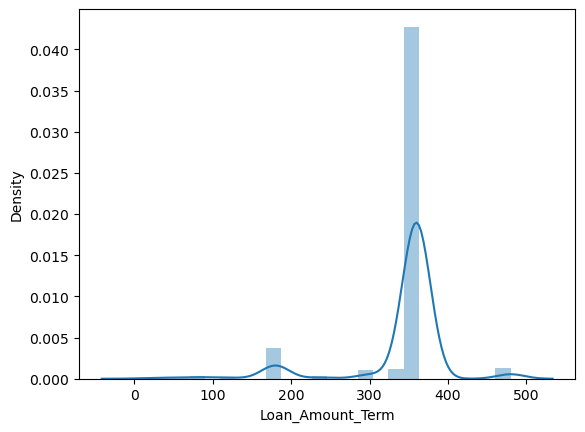

In [46]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit History', ylabel='Density'>

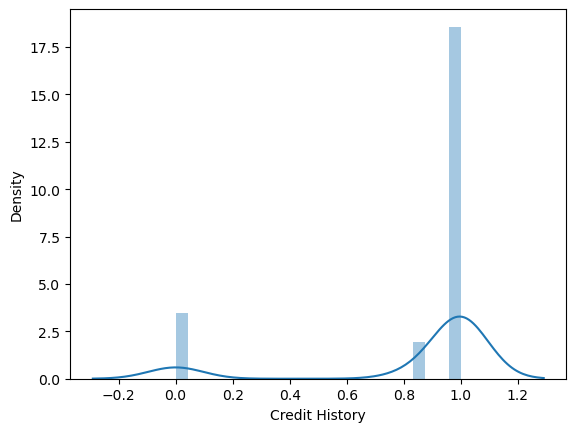

In [50]:
sns.distplot(df['Credit History'])

# Creation of new attributes

In [51]:
df['Total_Income'] = df['Applicant_Income'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependants,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='Total_Income', ylabel='Density'>

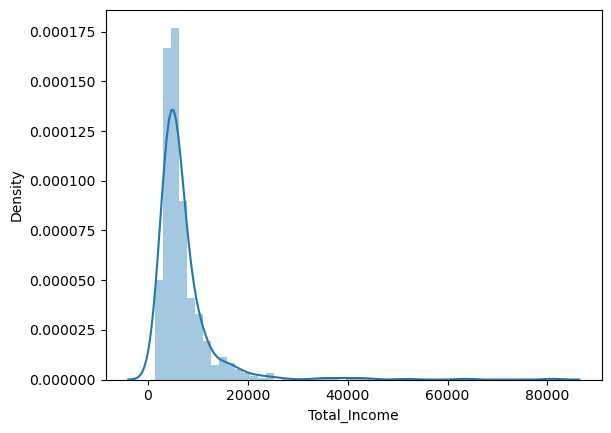

In [52]:
sns.distplot(df['Total_Income'])

As we see almost all of our numerical attributes are heavily skewed on LHS, We are going to Transform into Log


# Log Transformation

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependants         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Applicant_Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [56]:
df['Applicant_IncomeLog'] = np.log(df['Applicant_Income']+1)
df['CoapplicantIncomeLog'] = np.log(df['Applicant_Income']+1)
df['Loan_AmountLog'] = np.log(df['Loan_Amount']+1)
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term']+1)
df['Credit HistoryLog'] = np.log(df['Credit History']+1)
df['Total_IncomeLog']=np.log(df['Total_Income']+1)

<Axes: xlabel='Applicant_IncomeLog', ylabel='Density'>

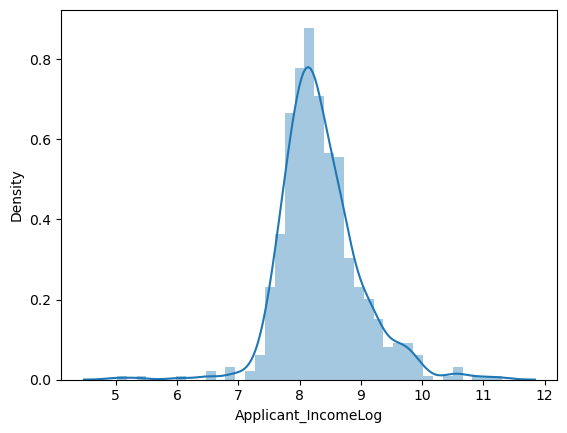

In [57]:
sns.distplot(df['Applicant_IncomeLog'])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

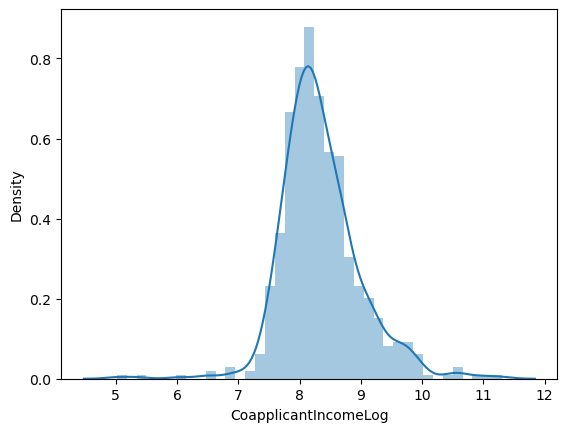

In [60]:
sns.distplot(df['CoapplicantIncomeLog'])


<Axes: xlabel='Loan_AmountLog', ylabel='Density'>

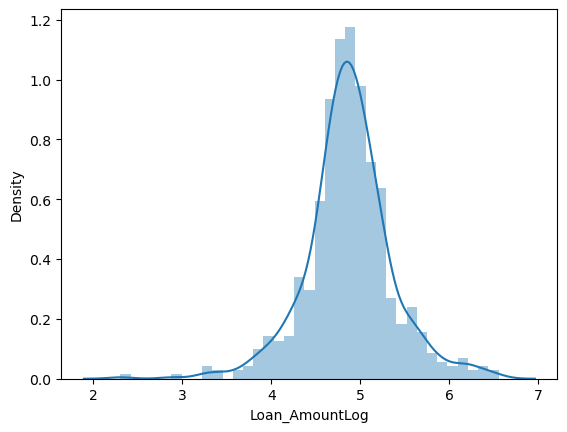

In [61]:
sns.distplot(df['Loan_AmountLog'])


<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

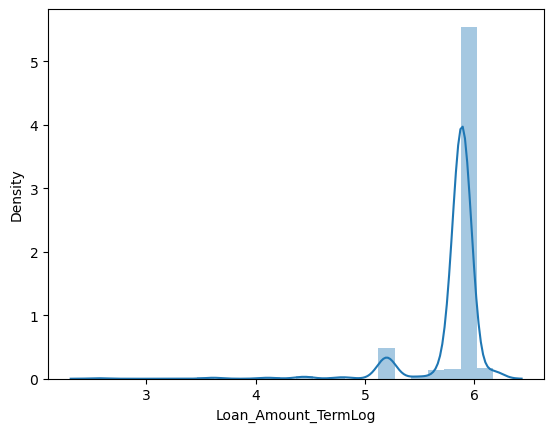

In [62]:
sns.distplot(df['Loan_Amount_TermLog'])


<Axes: xlabel='Credit HistoryLog', ylabel='Density'>

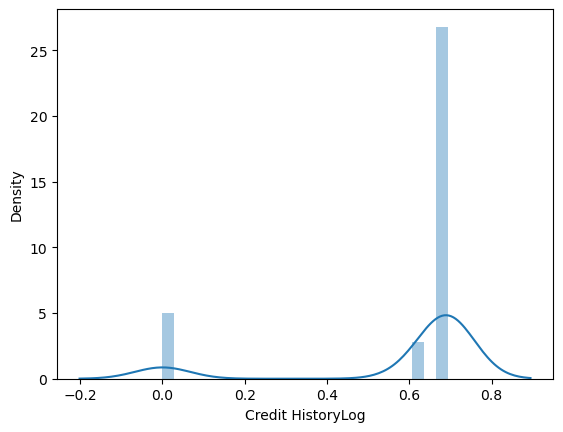

In [63]:
sns.distplot(df['Credit HistoryLog'])


<Axes: xlabel='Total_IncomeLog', ylabel='Density'>

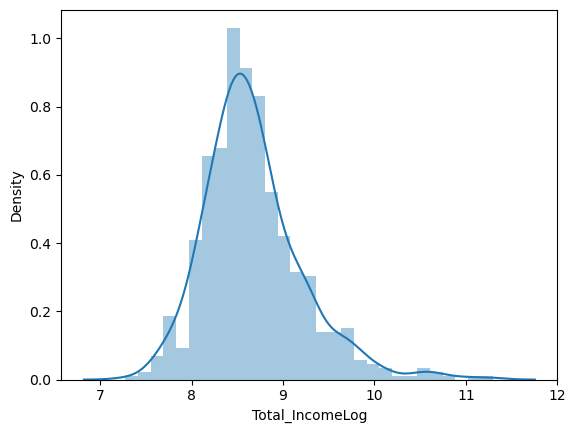

In [65]:
sns.distplot(df['Total_IncomeLog'])

Now, we see all are transformed into bell curved diagrams

# Correlation Matrix

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependants            614 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   Applicant_Income      614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   Loan_Amount           614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  Total_Income          614 non-null    float64
 14  Applicant_IncomeLog   614 non-null    float64
 15  CoapplicantIncomeLog  6

<Axes: >

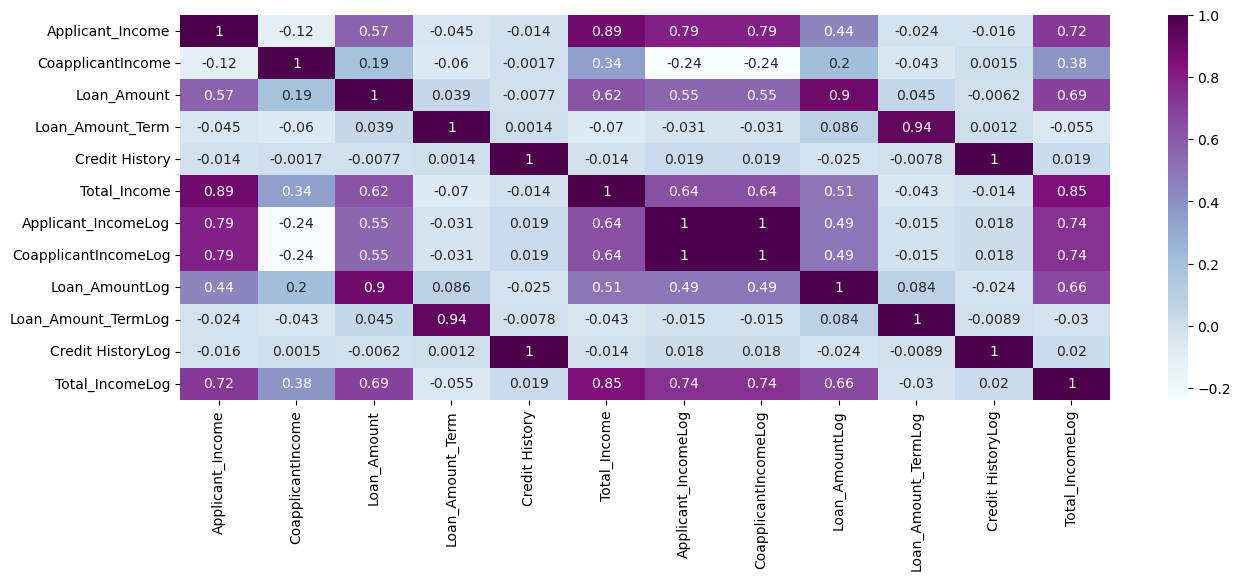

In [78]:
# Exclude non-numeric columns from correlation computation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True, cmap="BuPu")


As you see, the correlation is very high as we have both original numerical values and the LOg vaues, So we will have our Log values for trainig purpose, and delete all original columnn

In [79]:
df.head()

,Loan_ID,Gender,Married,Dependants,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status,Total_Income,Applicant_IncomeLog,CoapplicantIncomeLog,Loan_AmountLog,Loan_Amount_TermLog,Credit HistoryLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,8.674197,4.993232,5.888878,0.693147,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,8.430327,4.859812,5.888878,0.693147,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,8.006701,4.204693,5.888878,0.693147,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.857094,4.795791,5.888878,0.693147,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,8.699681,4.955827,5.888878,0.693147,8.699681


In [88]:

# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Loan_ID,Gender,Married,Dependants,Education,Self_Employed,Property_Area,Loan_Status,Applicant_IncomeLog,CoapplicantIncomeLog,Loan_AmountLog,Loan_Amount_TermLog,Credit HistoryLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,Urban,Y,8.674197,8.674197,4.993232,5.888878,0.693147,8.674197
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,8.430327,8.430327,4.859812,5.888878,0.693147,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,8.006701,8.006701,4.204693,5.888878,0.693147,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,7.857094,7.857094,4.795791,5.888878,0.693147,8.505525
4,LP001008,Male,No,0,Graduate,No,Urban,Y,8.699681,8.699681,4.955827,5.888878,0.693147,8.699681


In [91]:
cols=['Loan_ID']
df=df.drop(columns=cols,axis =1)
df.head()

,Gender,Married,Dependants,Education,Self_Employed,Property_Area,Loan_Status,Applicant_IncomeLog,CoapplicantIncomeLog,Loan_AmountLog,Loan_Amount_TermLog,Credit HistoryLog,Total_IncomeLog
0,Male,No,0,Graduate,No,Urban,Y,8.674197,8.674197,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,Rural,N,8.430327,8.430327,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,Urban,Y,8.006701,8.006701,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,Urban,Y,7.857094,7.857094,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,Urban,Y,8.699681,8.699681,4.955827,5.888878,0.693147,8.699681


We're now going to transform all categorical/string values to Numerical values , which will help us to Trin test our model.

# Label Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependants"]
le= LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [98]:
df.head()

,Gender,Married,Dependants,Education,Self_Employed,Property_Area,Loan_Status,Applicant_IncomeLog,CoapplicantIncomeLog,Loan_AmountLog,Loan_Amount_TermLog,Credit HistoryLog,Total_IncomeLog
0,1,0,0,0,0,2,1,8.674197,8.674197,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,0,0,8.430327,8.430327,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,2,1,8.006701,8.006701,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,2,1,7.857094,7.857094,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,2,1,8.699681,8.699681,4.955827,5.888878,0.693147,8.699681


# Train-Test Split

In [99]:
X= df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Model Training

In [101]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [104]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,X,y)
    

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [105]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 70.77922077922078
Cross validation is 72.64027722244435


In [106]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 78.99373583899774


In [107]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 72.72727272727273
Cross validation is 77.69292283086766


# Hyperparameter Tuning

In [108]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 80.45848327335733


# Confusion Matrix

In [109]:
 model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [110]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[23, 31],
       [ 4, 96]], dtype=int64)

<Axes: >

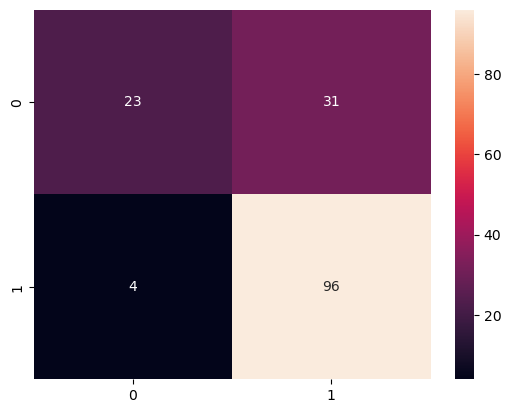

In [113]:
sns.heatmap(cm,annot=True)

In [114]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [115]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[28, 26],
       [18, 82]], dtype=int64)

<Axes: >

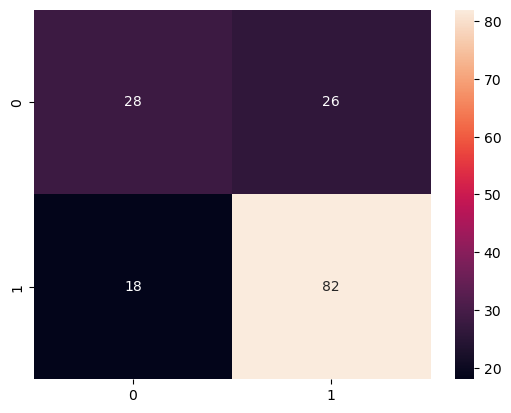

In [116]:
sns.heatmap(cm,annot=True)